## <font size=5> <strong>Heart Disease Prediction 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataset = pd.read_csv("heart.csv")

In [6]:
dataset.shape


(303, 14)

In [8]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
#condition
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]


for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [16]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [18]:
dataset["target"].unique()

array([1, 0], dtype=int64)

### Correlation between columns

In [20]:
print(dataset.corr()["target"].sort_values(ascending=False))

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


## Data Preprocessing

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
`

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  
        ('cat', OneHotEncoder(), categorical_cols)  
    ])
predictors = dataset.drop("target",axis=1)

predictors_processed = preprocessor.fit_transform(predictors)
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Train and split

In [119]:

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20)


predictors_processed = preprocessor.fit_transform(predictors)
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [95]:
dataset.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Exploratory Data Analysis (EDA)

target
1    165
0    138
Name: count, dtype: int64


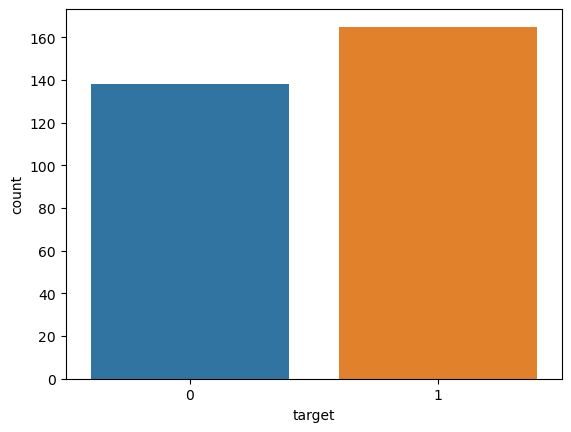

In [28]:
y = dataset["target"]

sns.countplot(x = y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [30]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))


Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [32]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='sex', ylabel='count'>

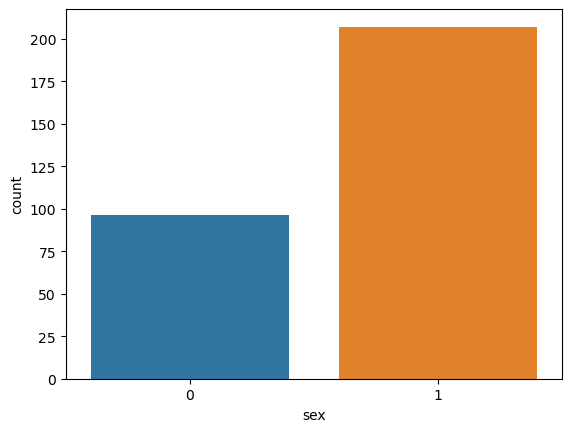

In [34]:
sns.countplot(x = dataset["sex"])

### Analysing the Chest Pain Type feature

In [36]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

<Axes: xlabel='cp', ylabel='count'>

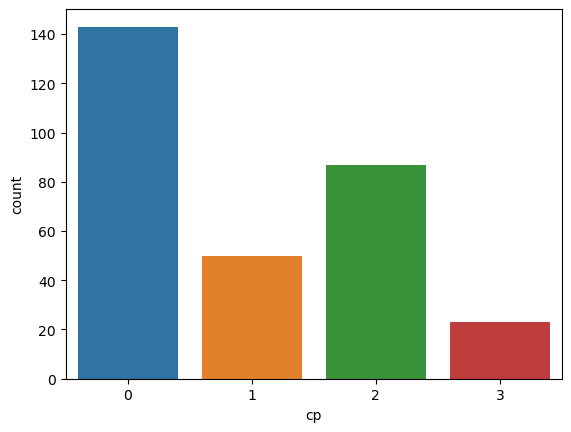

In [38]:
sns.countplot(x=dataset["cp"])

### Analysing the Fasting Blood Sugar feature

In [40]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [42]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='fbs', ylabel='count'>

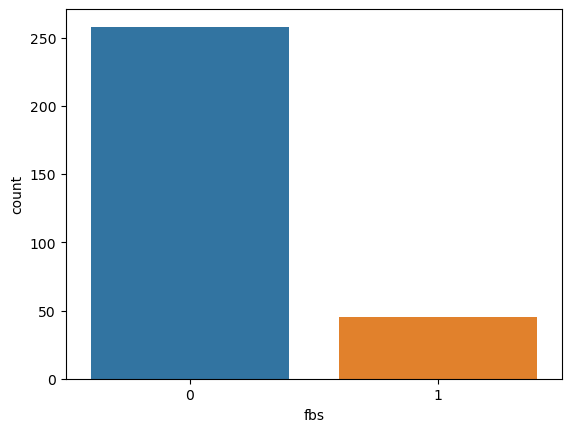

In [44]:
sns.countplot(x = dataset["fbs"])

### Analysing the resting electrocardiographic feature

In [46]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

<Axes: xlabel='restecg', ylabel='count'>

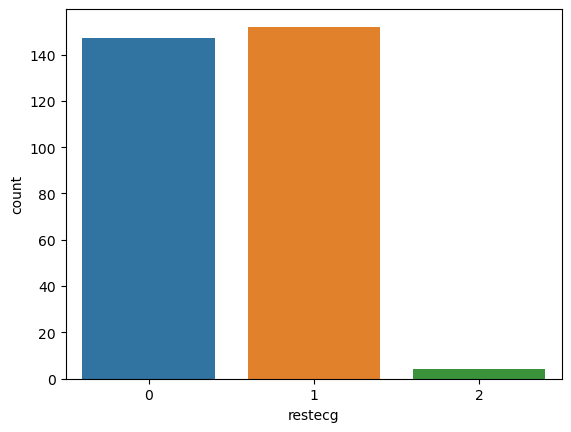

In [48]:
sns.countplot(x = dataset["restecg"])

### Analysing the exercise induced angina feature

In [123]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='exang', ylabel='count'>

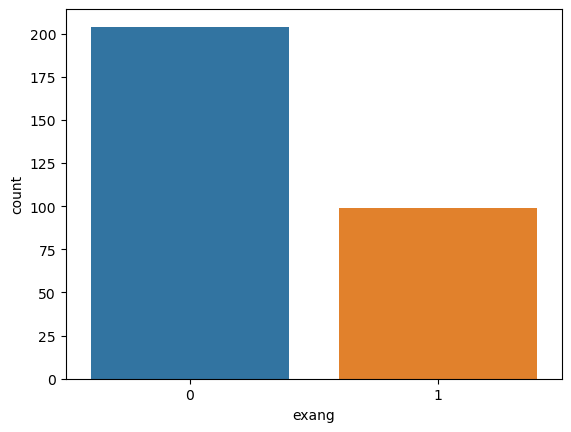

In [125]:
sns.countplot(x  = dataset["exang"])

### Analysing the Slope feature

In [127]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

<Axes: xlabel='slope', ylabel='count'>

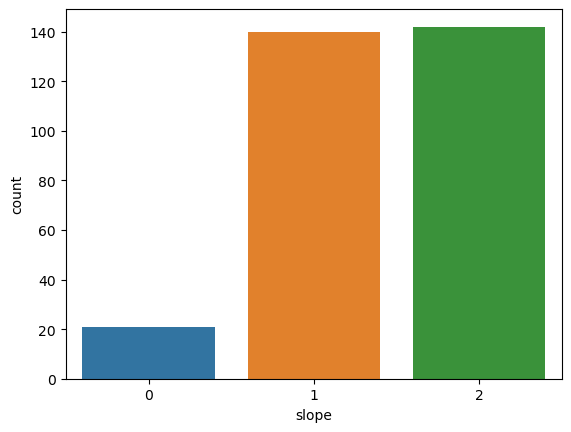

In [129]:
sns.countplot(x = dataset["slope"])

### Analysing the number of major vessels (0-3) feature

In [131]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<Axes: xlabel='ca', ylabel='count'>

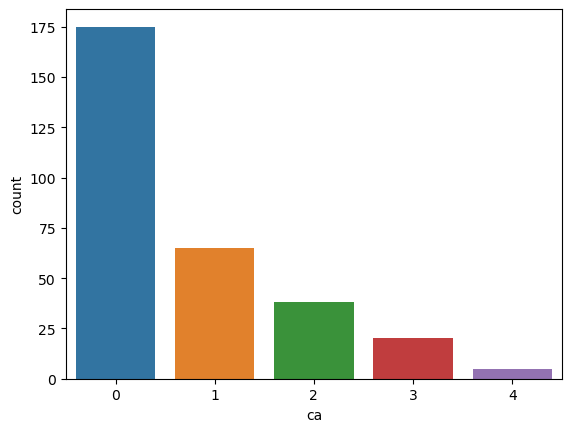

In [133]:
sns.countplot(x = dataset["ca"])

### Analysing the 'thal' feature

In [135]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

<Axes: xlabel='thal', ylabel='count'>

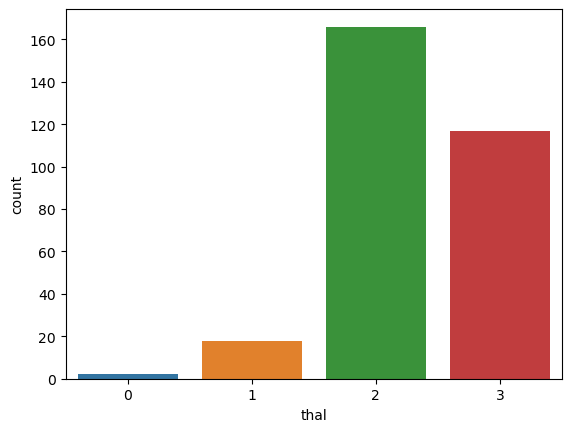

In [137]:
sns.countplot( x = dataset["thal"])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='thal', ylabel='Count'>

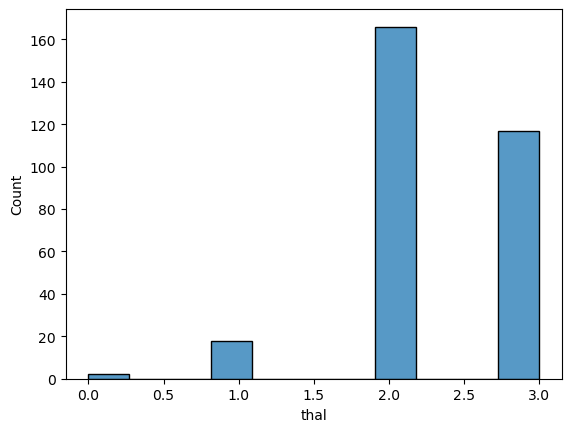

In [64]:
sns.histplot(dataset["thal"])

## IV. Train Test split

In [50]:
from sklearn.model_selection import train_test_split
predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20)

In [141]:
X_train.shape

(242, 13)

In [143]:
X_test.shape

(61, 13)

In [145]:
Y_train.shape

(242,)

In [147]:
Y_test.shape

(61,)

## V. Model Fitting

In [52]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [144]:
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression( max_iter=500)
# lr.fit(X_train,Y_train)
# Y_pred_lr = lr.predict(X_test)


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=500))
pipeline.fit(X_train, Y_train)
Y_pred_lr = pipeline.predict(X_test)



In [134]:
Y_pred_lr.shape

(61,)

In [148]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.89 %


### Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_pred_nb = nb.predict(X_test)

In [62]:
Y_pred_nb.shape

(61,)

In [64]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 73.77 %


### SVM

In [66]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [68]:
Y_pred_svm.shape

(61,)

In [70]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 77.05 %


### K Nearest Neighbors

In [150]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [152]:
Y_pred_knn.shape


(61,)

In [154]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 63.93 %


### Decision Tree

In [156]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [158]:
print(Y_pred_dt.shape)

(61,)


In [160]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 73.77 %


### Random Forest

In [162]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [86]:
Y_pred_rf.shape

(61,)

In [164]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 88.52 %


## VI. final 

In [166]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 86.89 %
The accuracy score achieved using Naive Bayes is: 73.77 %
The accuracy score achieved using Support Vector Machine is: 77.05 %
The accuracy score achieved using K-Nearest Neighbors is: 63.93 %
The accuracy score achieved using Decision Tree is: 73.77 %
The accuracy score achieved using Random Forest is: 88.52 %


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

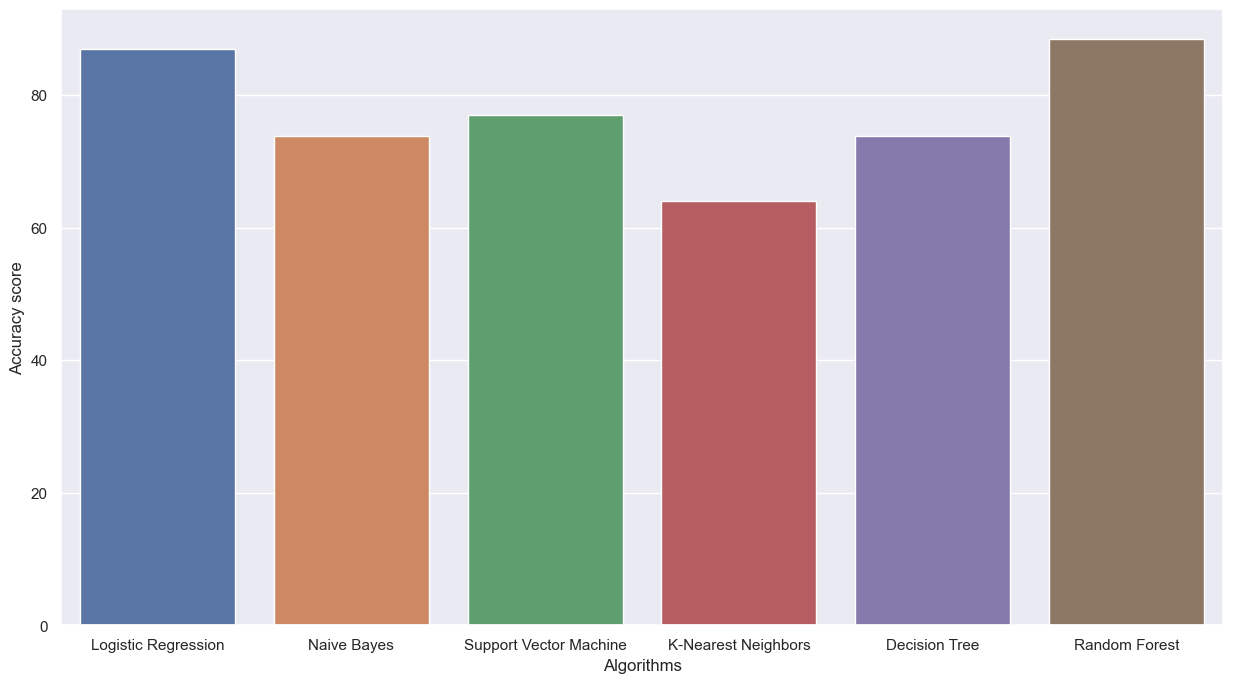

In [168]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x = algorithms, y = scores)

# Testing 


## Logistic  Regression

In [170]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
)
score_lr = round(accuracy_score(Y_test, Y_pred_lr) * 100, 2)
print("The accuracy score achieved using Logistic Regression is: " + str(score_lr) + " %")

cm = confusion_matrix(Y_test, Y_pred_lr)
print("Confusion Matrix:\n", cm)

precision = precision_score(Y_test, Y_pred_lr)
print("Precision: {:.2f}".format(precision))

recall = recall_score(Y_test, Y_pred_lr)
print("Recall: {:.2f}".format(recall))

f1 = f1_score(Y_test, Y_pred_lr)
print("F1 Score: {:.2f}".format(f1))

tn, fp, fn, tp = cm.ravel() 
specificity = tn / (tn + fp)  
print("Specificity: {:.2f}".format(specificity))

The accuracy score achieved using Logistic Regression is: 86.89 %
Confusion Matrix:
 [[17  7]
 [ 1 36]]
Precision: 0.84
Recall: 0.97
F1 Score: 0.90
Specificity: 0.71


## Naive Bayes

In [172]:


score_nb = round(accuracy_score(Y_test, Y_pred_nb) * 100, 2)
print("The accuracy score achieved using Naive Bayes is: " + str(score_nb) + " %")

cm_nb = confusion_matrix(Y_test, Y_pred_nb)
print("Confusion Matrix for Naive Bayes:\n", cm_nb)

precision_nb = precision_score(Y_test, Y_pred_nb)
print("Precision for Naive Bayes: {:.2f}".format(precision_nb))

recall_nb = recall_score(Y_test, Y_pred_nb)
print("Recall for Naive Bayes: {:.2f}".format(recall_nb))

f1_nb = f1_score(Y_test, Y_pred_nb)
print("F1 Score for Naive Bayes: {:.2f}".format(f1_nb))

tn_nb, fp_nb, fn_nb, tp_nb = cm_nb.ravel()
specificity_nb = tn_nb / (tn_nb + fp_nb)
print("Specificity for Naive Bayes: {:.2f}".format(specificity_nb))


The accuracy score achieved using Naive Bayes is: 47.54 %
Confusion Matrix for Naive Bayes:
 [[ 7 17]
 [15 22]]
Precision for Naive Bayes: 0.56
Recall for Naive Bayes: 0.59
F1 Score for Naive Bayes: 0.58
Specificity for Naive Bayes: 0.29


##  SVM

In [174]:

score_svm = round(accuracy_score(Y_test, Y_pred_svm) * 100, 2)
print("The accuracy score achieved using SVM is: " + str(score_svm) + " %")

cm_svm = confusion_matrix(Y_test, Y_pred_svm)
print("Confusion Matrix for SVM:\n", cm_svm)

precision_svm = precision_score(Y_test, Y_pred_svm)
print("Precision for SVM: {:.2f}".format(precision_svm))

recall_svm = recall_score(Y_test, Y_pred_svm)
print("Recall for SVM: {:.2f}".format(recall_svm))

f1_svm = f1_score(Y_test, Y_pred_svm)
print("F1 Score for SVM: {:.2f}".format(f1_svm))

tn_svm, fp_svm, fn_svm, tp_svm = cm_svm.ravel()
specificity_svm = tn_svm / (tn_svm + fp_svm)
print("Specificity for SVM: {:.2f}".format(specificity_svm))


The accuracy score achieved using SVM is: 50.82 %
Confusion Matrix for SVM:
 [[ 9 15]
 [15 22]]
Precision for SVM: 0.59
Recall for SVM: 0.59
F1 Score for SVM: 0.59
Specificity for SVM: 0.38


In [176]:

score_knn = round(accuracy_score(Y_test, Y_pred_knn) * 100, 2)
print("The accuracy score achieved using KNN is: " + str(score_knn) + " %")

cm_knn = confusion_matrix(Y_test, Y_pred_knn)
print("Confusion Matrix for KNN:\n", cm_knn)

precision_knn = precision_score(Y_test, Y_pred_knn)
print("Precision for KNN: {:.2f}".format(precision_knn))

recall_knn = recall_score(Y_test, Y_pred_knn)
print("Recall for KNN: {:.2f}".format(recall_knn))

f1_knn = f1_score(Y_test, Y_pred_knn)
print("F1 Score for KNN: {:.2f}".format(f1_knn))

tn_knn, fp_knn, fn_knn, tp_knn = cm_knn.ravel()
specificity_knn = tn_knn / (tn_knn + fp_knn)
print("Specificity for KNN: {:.2f}".format(specificity_knn))


The accuracy score achieved using KNN is: 63.93 %
Confusion Matrix for KNN:
 [[12 12]
 [10 27]]
Precision for KNN: 0.69
Recall for KNN: 0.73
F1 Score for KNN: 0.71
Specificity for KNN: 0.50


## Decision Tree

In [178]:

score_dt = round(accuracy_score(Y_test, Y_pred_dt) * 100, 2)
print("The accuracy score achieved using Decision Tree is: " + str(score_dt) + " %")

cm_dt = confusion_matrix(Y_test, Y_pred_dt)
print("Confusion Matrix for Decision Tree:\n", cm_dt)

precision_dt = precision_score(Y_test, Y_pred_dt)
print("Precision for Decision Tree: {:.2f}".format(precision_dt))

recall_dt = recall_score(Y_test, Y_pred_dt)
print("Recall for Decision Tree: {:.2f}".format(recall_dt))

f1_dt = f1_score(Y_test, Y_pred_dt)
print("F1 Score for Decision Tree: {:.2f}".format(f1_dt))

tn_dt, fp_dt, fn_dt, tp_dt = cm_dt.ravel()
specificity_dt = tn_dt / (tn_dt + fp_dt)
print("Specificity for Decision Tree: {:.2f}".format(specificity_dt))


The accuracy score achieved using Decision Tree is: 73.77 %
Confusion Matrix for Decision Tree:
 [[14 10]
 [ 6 31]]
Precision for Decision Tree: 0.76
Recall for Decision Tree: 0.84
F1 Score for Decision Tree: 0.79
Specificity for Decision Tree: 0.58


##  Random Forest

In [180]:

score_rf = round(accuracy_score(Y_test, Y_pred_rf) * 100, 2)
print("The accuracy score achieved using Random Forest is: " + str(score_rf) + " %")

cm_rf = confusion_matrix(Y_test, Y_pred_rf)
print("Confusion Matrix for Random Forest:\n", cm_rf)

precision_rf = precision_score(Y_test, Y_pred_rf)
print("Precision for Random Forest: {:.2f}".format(precision_rf))

recall_rf = recall_score(Y_test, Y_pred_rf)
print("Recall for Random Forest: {:.2f}".format(recall_rf))

f1_rf = f1_score(Y_test, Y_pred_rf)
print("F1 Score for Random Forest: {:.2f}".format(f1_rf))

tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()
specificity_rf = tn_rf / (tn_rf + fp_rf)
print("Specificity for Random Forest: {:.2f}".format(specificity_rf))


The accuracy score achieved using Random Forest is: 88.52 %
Confusion Matrix for Random Forest:
 [[18  6]
 [ 1 36]]
Precision for Random Forest: 0.86
Recall for Random Forest: 0.97
F1 Score for Random Forest: 0.91
Specificity for Random Forest: 0.75


In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

models = ["Logistic Regression", "Naive Bayes", "SVM", "KNN", "Decision Tree", "Random Forest"]

results = []

Y_pred_models = [Y_pred_lr, Y_pred_nb, Y_pred_svm, Y_pred_knn, Y_pred_dt, Y_pred_rf]

for model, Y_pred in zip(models, Y_pred_models):
    accuracy = round(accuracy_score(Y_test, Y_pred) * 100, 2)
    cm = confusion_matrix(Y_test, Y_pred)
    precision = round(precision_score(Y_test, Y_pred), 2)
    recall = round(recall_score(Y_test, Y_pred), 2)
    f1 = round(f1_score(Y_test, Y_pred), 2)
    
    
    tn, fp, fn, tp = cm.ravel()
    specificity = round(tn / (tn + fp), 2)
    
    results.append([model, accuracy, precision, recall, f1, specificity])


metrics_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Specificity"])

print(metrics_df)


                 Model  Accuracy  Precision  Recall  F1 Score  Specificity
0  Logistic Regression     86.89       0.84    0.97      0.90         0.71
1          Naive Bayes     47.54       0.56    0.59      0.58         0.29
2                  SVM     50.82       0.59    0.59      0.59         0.38
3                  KNN     63.93       0.69    0.73      0.71         0.50
4        Decision Tree     73.77       0.76    0.84      0.79         0.58
5        Random Forest     88.52       0.86    0.97      0.91         0.75


## Accuracy


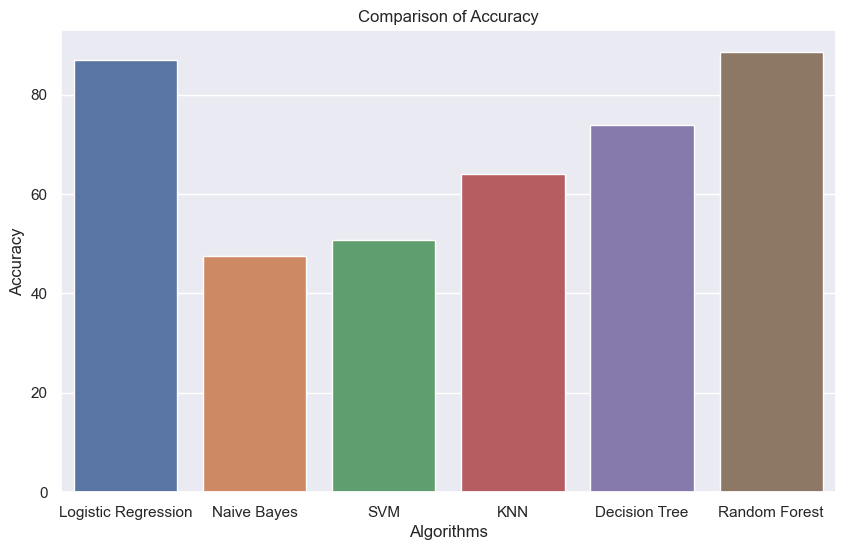

In [184]:

metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity"]


sns.set(rc={'figure.figsize':(10,6)})

plt.figure()
sns.barplot(x='Model', y='Accuracy', data=metrics_df)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy')
plt.show()


## Precision

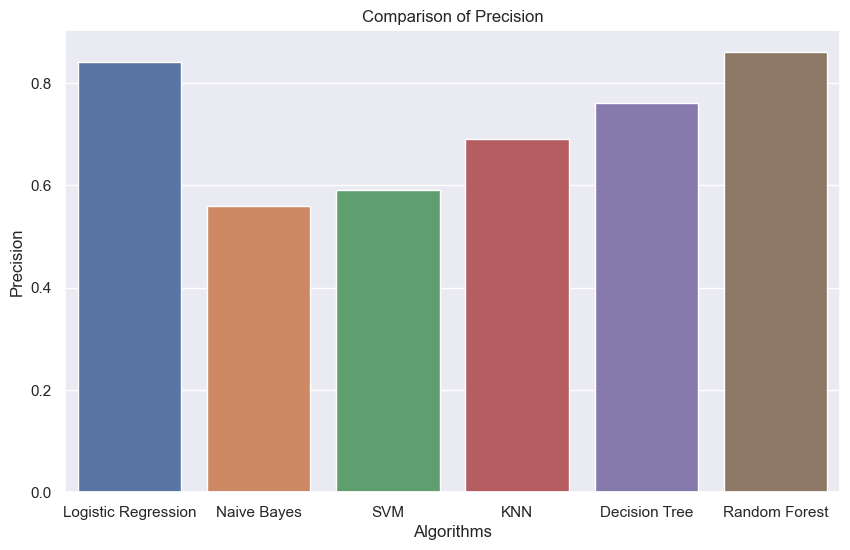

In [186]:

plt.figure()
sns.barplot(x='Model', y='Precision', data=metrics_df)
plt.xlabel('Algorithms')
plt.ylabel('Precision')
plt.title('Comparison of Precision')
plt.show()


## Recall


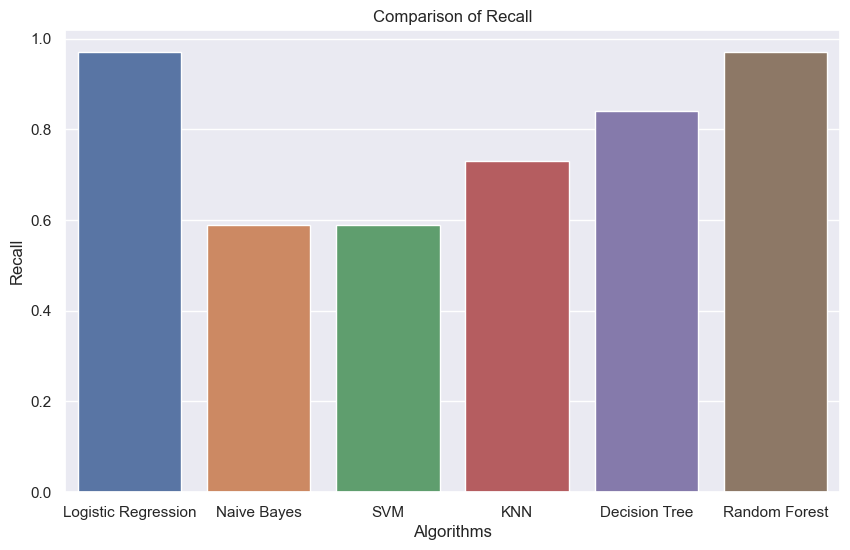

In [188]:


plt.figure()
sns.barplot(x='Model', y='Recall', data=metrics_df)
plt.xlabel('Algorithms')
plt.ylabel('Recall')
plt.title('Comparison of Recall')
plt.show()



## F1 Score

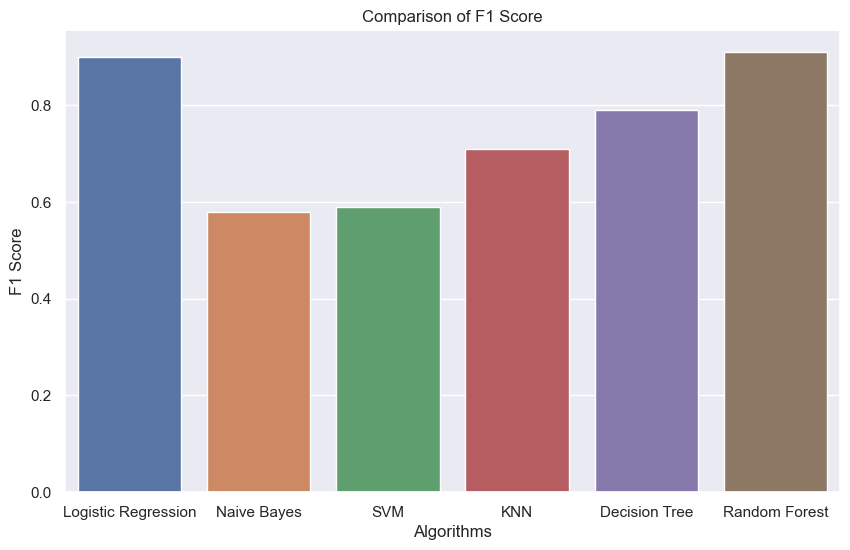

In [190]:

plt.figure()
sns.barplot(x='Model', y='F1 Score', data=metrics_df)
plt.xlabel('Algorithms')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Score')
plt.show()



## Specificity


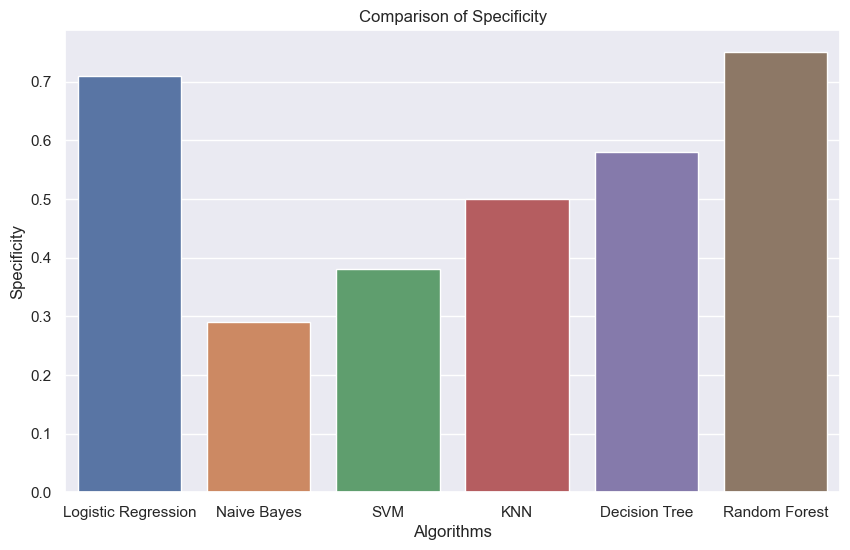

In [192]:

plt.figure()
sns.barplot(x='Model', y='Specificity', data=metrics_df)
plt.xlabel('Algorithms')
plt.ylabel('Specificity')
plt.title('Comparison of Specificity')
plt.show()

                 Model  Training Accuracy  Test Accuracy
0  Logistic Regression              85.54          86.89
1          Naive Bayes              83.06          86.89
2                  SVM              85.12          83.61
3                  KNN              75.62          63.93
4        Decision Tree             100.00          73.77
5        Random Forest             100.00          88.52


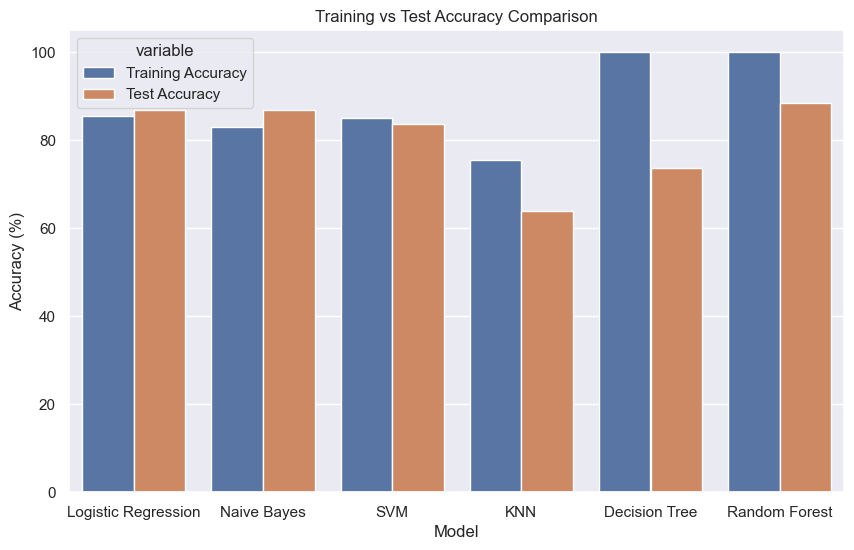

In [194]:
from sklearn.metrics import accuracy_score

models = [
    ("Logistic Regression", lr),
    ("Naive Bayes", nb),
    ("SVM", sv),
    ("KNN", knn),
    ("Decision Tree", dt),
    ("Random Forest", rf),
]


train_accuracies = []
test_accuracies = []
model_names = []


for name, model in models:
    # Training 
    Y_train_pred = model.predict(X_train)
    train_accuracy = round(accuracy_score(Y_train, Y_train_pred) * 100, 2)
    train_accuracies.append(train_accuracy)
    
    # Test 
    Y_test_pred = model.predict(X_test)
    test_accuracy = round(accuracy_score(Y_test, Y_test_pred) * 100, 2)
    test_accuracies.append(test_accuracy)


for name, _ in models:
    model_names.append(name)
    
accuracy_df = pd.DataFrame({
    'Model': model_names,
    'Training Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
})

print(accuracy_df)


plt.figure()
sns.barplot(x='Model', y='value', hue='variable', 
            data=pd.melt(accuracy_df, id_vars=['Model'], value_vars=['Training Accuracy', 'Test Accuracy']))
plt.title('Training vs Test Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.show()

In [116]:
import pandas as pd

print("Please provide the following values:")

age = int(input("Enter age : "))
sex = int(input("Enter sex (1 = male, 0 = female): "))
cp = int(input("Enter chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic): "))
trestbps = int(input("Enter resting blood pressure in mm Hg (Ideal range: 94-200): "))
chol = int(input("Enter serum cholesterol in mg/dL (Ideal range: 126-564): "))
fbs = int(input("Is fasting blood sugar > 120 mg/dL? (1 = yes, 0 = no): "))
restecg = int(input("Enter resting electrocardiographic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy): "))
thalach = int(input("Enter maximum heart rate achieved (Ideal range: 71-202): "))
exang = int(input("Enter exercise-induced angina (1 = yes, 0 = no): "))
oldpeak = float(input("Enter ST depression induced by exercise relative to rest (Ideal range: 0.0-6.2): "))
slope = int(input("Enter the slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping): "))
ca = int(input("Enter number of major vessels (0-3) colored by fluoroscopy: "))
thal = int(input("Enter thalassemia type (1 = normal, 2 = fixed defect, 3 = reversible defect): "))

custom_data = {
    'age': age,
    'sex': sex,
    'cp': cp,
    'trestbps': trestbps,
    'chol': chol,
    'fbs': fbs,
    'restecg': restecg,
    'thalach': thalach,
    'exang': exang,
    'oldpeak': oldpeak,
    'slope': slope,
    'ca': ca,
    'thal': thal
}

custom_df = pd.DataFrame([custom_data])
custom_probability = rf.predict_proba(custom_df)[:, 1][0] * 100


threshold = 50.0
result = "High Chance of Heart Disease" if custom_probability > threshold else "Low Chance of Heart Disease"

print(f"\nYou Have : {result}")
print(f"Probability of Heart Disease: {custom_probability:.2f}%")


Please provide the following values:


Enter age :  12
Enter sex (1 = male, 0 = female):  1
Enter chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic):  1
Enter resting blood pressure in mm Hg (Ideal range: 94-200):  100
Enter serum cholesterol in mg/dL (Ideal range: 126-564):  150
Is fasting blood sugar > 120 mg/dL? (1 = yes, 0 = no):  0
Enter resting electrocardiographic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy):  0
Enter maximum heart rate achieved (Ideal range: 71-202):  75
Enter exercise-induced angina (1 = yes, 0 = no):  0
Enter ST depression induced by exercise relative to rest (Ideal range: 0.0-6.2):  0
Enter the slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping):  2
Enter number of major vessels (0-3) colored by fluoroscopy:  0
Enter thalassemia type (1 = normal, 2 = fixed defect, 3 = reversible defect):  1



You Have : High Chance of Heart Disease
Probability of Heart Disease: 65.00%
